In [47]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

%matplotlib inline
import wrangle as wr
import acquire as ac
seed = 42

# Clustering with the Iris Dataset


In [19]:
df = sns.load_dataset('iris')

In [20]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Choose features other than the ones used in the lesson.

In [21]:
iris = df[['sepal_width','petal_width']]

In [5]:
iris

,sepal_width,petal_width
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2
...,...,...
145,3.0,2.3
146,2.5,1.9
147,3.0,2.0
148,3.4,2.3


# Visualize the results of your clustering

## function

In [60]:
def cluster(df, k,fit):
    kmeans = KMeans(n_clusters= k)
    
    kmeans.fit(df[fit])
    
    df['cluster' + str(k)] = kmeans.predict(df[fit])
    
    
    return df
    

## create k object

In [7]:
iris = cluster(iris, 2)

<AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>

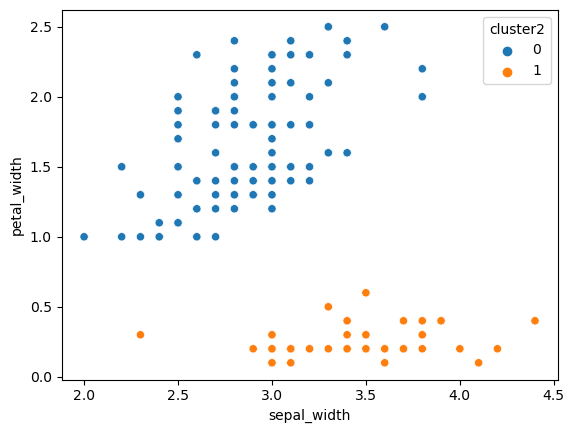

In [8]:
sns.scatterplot(data= iris, x = 'sepal_width', y = 'petal_width', hue = 'cluster2')


# Use the elbow method to visually select a good value for k.

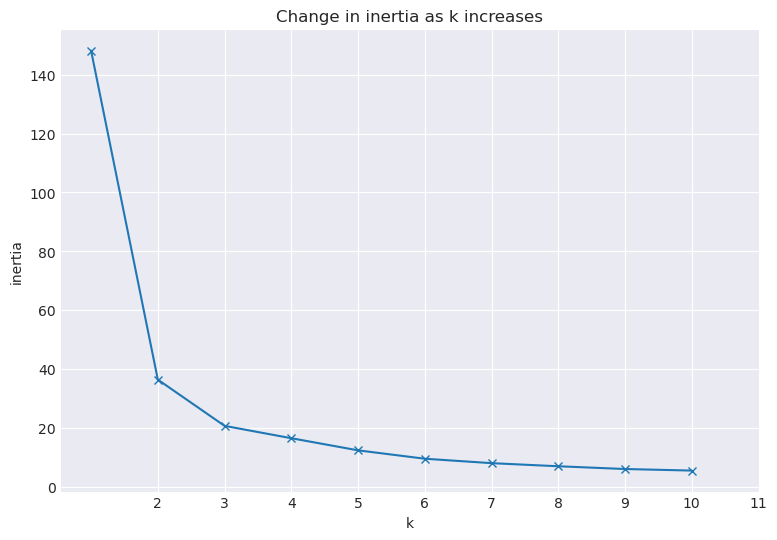

In [9]:
with plt.style.context('seaborn-darkgrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(iris).inertia_ for k in range(1, 11)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    

# Repeat the clustering, this time with 3 different features.

In [10]:
iris = cluster(iris, 3)

In [11]:
iris = cluster(iris, 4)

In [12]:
iris = cluster(iris, 5)

In [13]:
iris

,sepal_width,petal_width,cluster2,cluster3,cluster4,cluster5
0,3.5,0.2,1,1,0,1
1,3.0,0.2,1,1,0,1
2,3.2,0.2,1,1,0,1
3,3.1,0.2,1,1,0,1
4,3.6,0.2,1,1,0,3
...,...,...,...,...,...,...
145,3.0,2.3,0,2,3,2
146,2.5,1.9,0,2,2,0
147,3.0,2.0,0,2,3,2
148,3.4,2.3,0,2,3,2


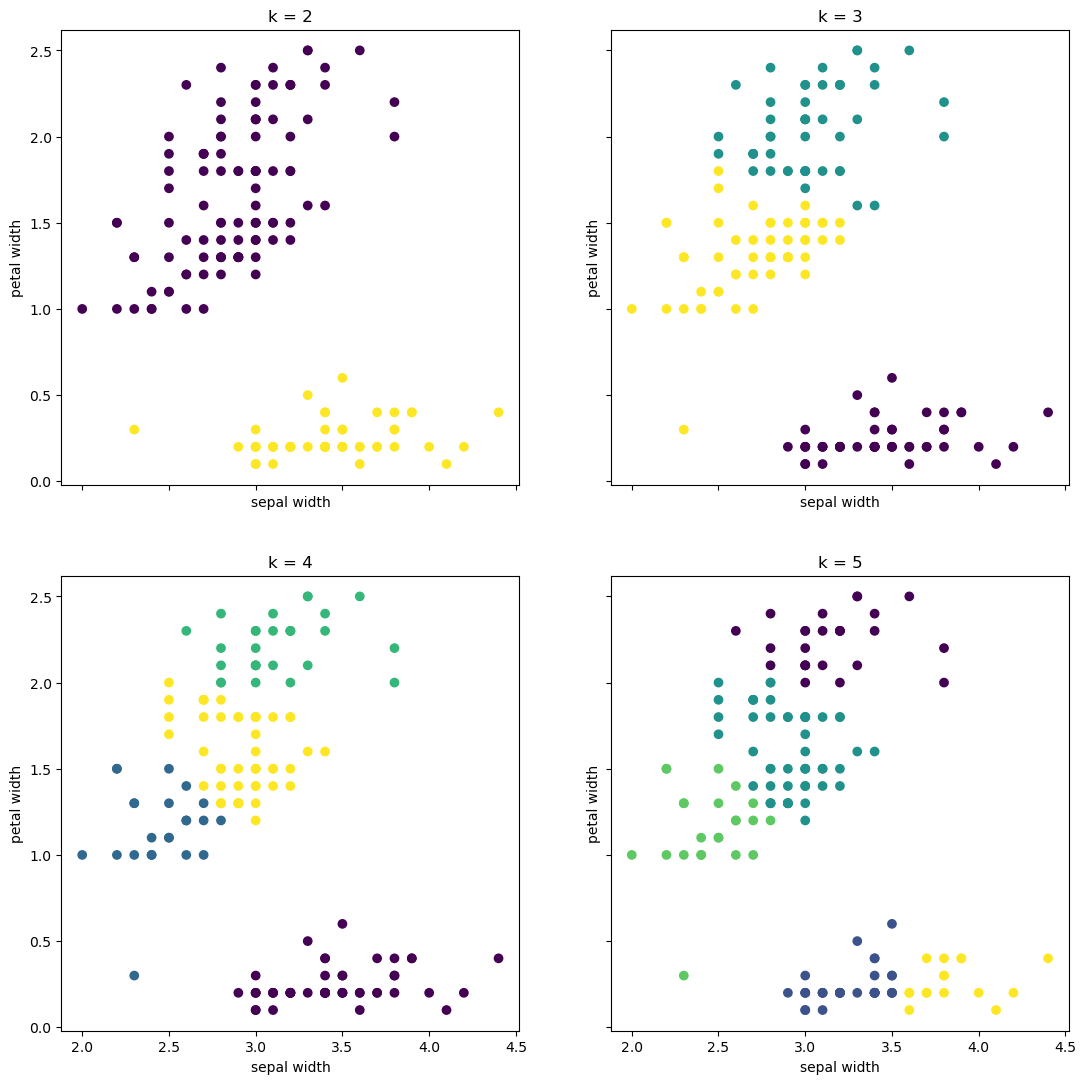

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(iris[['petal_width','sepal_width']]).predict(iris[['petal_width','sepal_width']])
    ax.scatter(iris.sepal_width, iris.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')

# SPLIT

In [29]:
train,validate,test = wr.split_data(iris)

(84, 2) (36, 2) (30, 2)


# Scaling

In [32]:
train

,sepal_width,petal_width
56,3.3,1.6
40,3.5,0.3
70,3.2,1.8
23,3.3,0.5
139,3.1,2.1
...,...,...
78,2.9,1.5
55,2.8,1.3
125,3.2,1.8
22,3.6,0.2


In [35]:
trainS,validateS, testS = wr.scaled_data(train,validate,test,['sepal_width','petal_width'])

In [40]:
trainS = cluster(trainS, 2)

In [41]:
trainS = cluster(trainS, 3)

In [42]:
trainS = cluster(trainS, 4)

In [43]:
trainS = cluster(trainS, 5)

In [44]:
trainS

,sepal_width,petal_width,cluster2,cluster3,cluster4,cluster5
56,0.65,0.625000,0,2,2,1
40,0.75,0.083333,1,1,1,3
70,0.60,0.708333,0,2,2,1
23,0.65,0.166667,1,1,1,2
139,0.55,0.833333,0,2,3,1
...,...,...,...,...,...,...
78,0.45,0.583333,0,0,2,0
55,0.40,0.500000,0,0,2,0
125,0.60,0.708333,0,2,2,1
22,0.80,0.041667,1,1,1,3


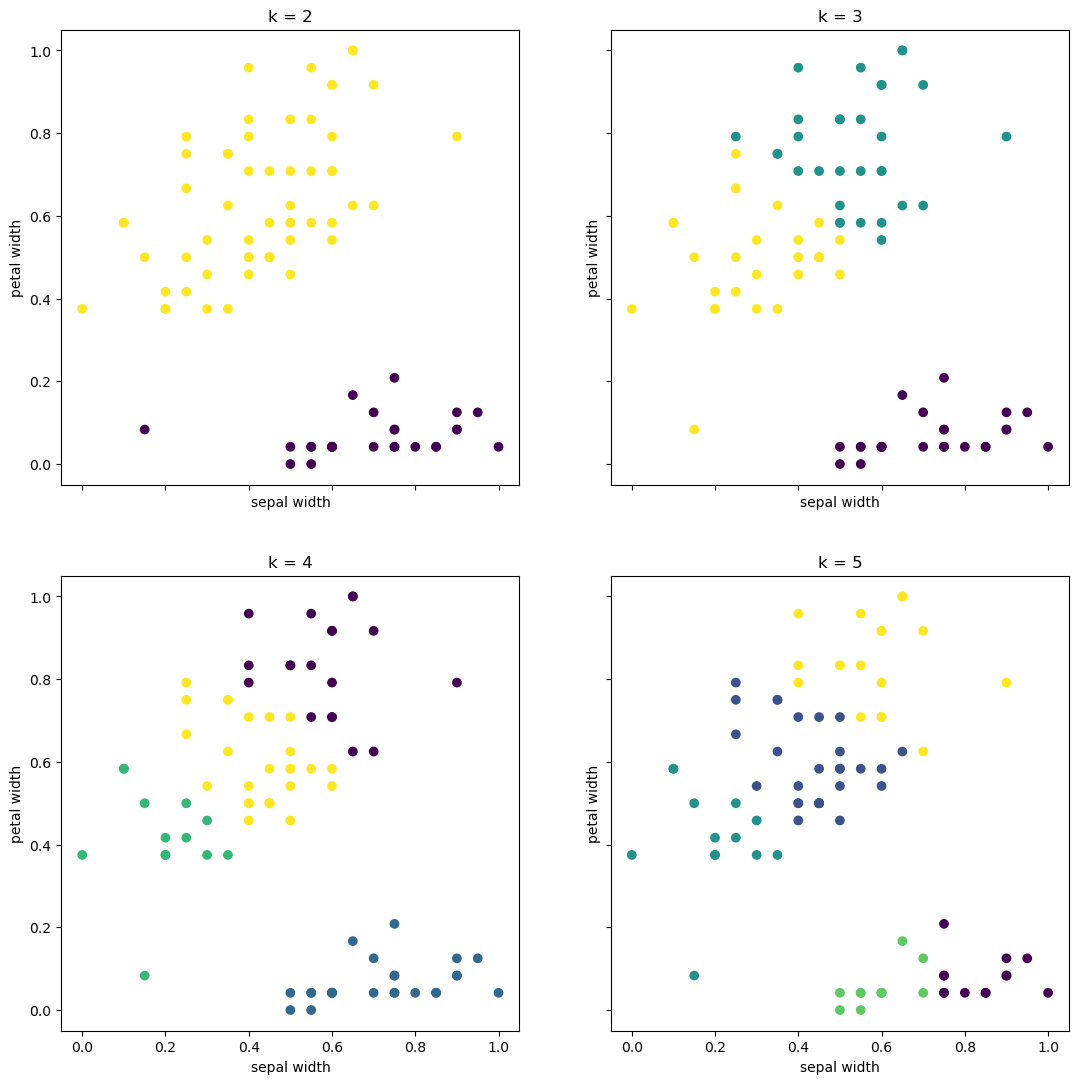

In [45]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(trainS[['petal_width','sepal_width']]).predict(trainS[['petal_width','sepal_width']])
    ax.scatter(trainS.sepal_width, trainS.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')

In [46]:
# take aways are that some changes have occured but not drastically

,sepal_width,petal_width,cluster2,cluster3,cluster4,cluster5
56,0.65,0.625000,0,2,2,1
40,0.75,0.083333,1,1,1,3
70,0.60,0.708333,0,2,2,1
23,0.65,0.166667,1,1,1,2
139,0.55,0.833333,0,2,3,1
...,...,...,...,...,...,...
78,0.45,0.583333,0,0,2,0
55,0.40,0.500000,0,0,2,0
125,0.60,0.708333,0,2,2,1
22,0.80,0.041667,1,1,1,3


# Mall

In [50]:
df = wr.get_mall_data()

In [55]:
dfc = df[['annual_income','spending_score']]

# check inertia

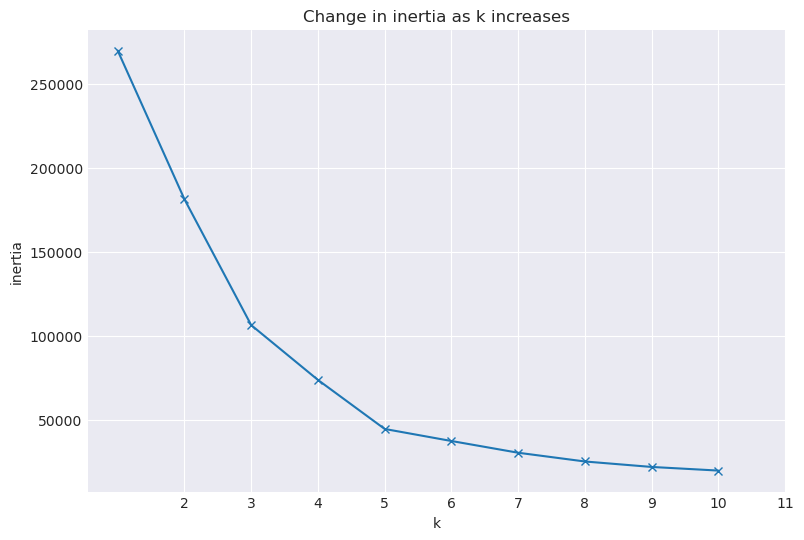

In [56]:
with plt.style.context('seaborn-darkgrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(dfc).inertia_ for k in range(1, 11)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [61]:
cluster(dfc,3,['annual_income','spending_score'])

,annual_income,spending_score,cluster3
0,15,39,0
1,15,81,0
2,16,6,0
3,16,77,0
4,17,40,0
...,...,...,...
195,120,79,2
196,126,28,1
197,126,74,2
198,137,18,1


<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

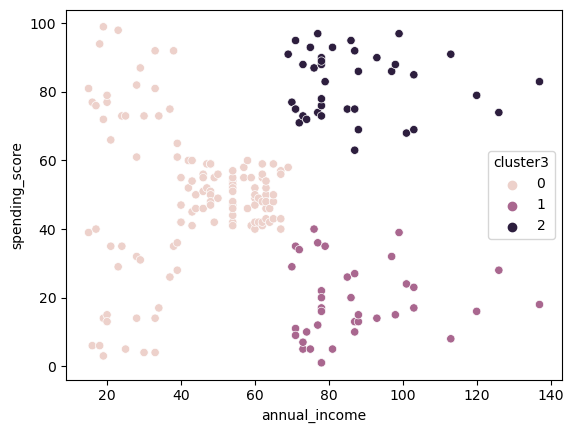

In [62]:
sns.scatterplot(data = dfc , x = 'annual_income', y = 'spending_score',hue = 'cluster3')

# split

In [68]:
train,v,t= wr.split_data(dfc)

(112, 3) (48, 3) (40, 3)


# scale

In [69]:
train, v,t = wr.scaled_data(train,v,t, ['annual_income','spending_score'])

In [72]:
cluster(train,3,['annual_income','spending_score'])

,annual_income,spending_score,cluster3
123,0.442623,0.957447,2
76,0.319672,0.553191,0
171,0.590164,0.787234,2
10,0.032787,0.138298,1
35,0.147541,0.851064,0
...,...,...,...
175,0.598361,0.904255,2
101,0.385246,0.500000,0
148,0.516393,0.223404,1
99,0.377049,0.510638,0


<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

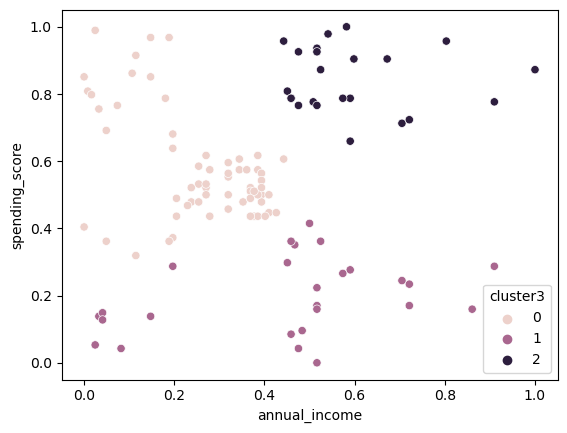

In [73]:
sns.scatterplot(data = train , x = 'annual_income', y = 'spending_score',hue = 'cluster3')